# The Most in Demand Skills for Data Scientists
## What are employers looking for?
## By Jeff Hale

I'm going to explore which skills and software for Data Scientists are in demand in the US in October 2018 by looking at online job listing sites. I'll be using plotly and pandas to make interactive visualizations for this project.

### See [this Medium article](https://towardsdatascience.com/the-most-in-demand-skills-for-data-scientists-4a4a8db896db) for discussion.

# Please upvote this Kaggle kernel if you find it helpful.

In [1]:
# import the usual frameworks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import warnings

from IPython.core.display import display, HTML
from sklearn.preprocessing import MinMaxScaler
    
# import plotly 
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls

# for color scales in plotly
import colorlover as cl 

# configure things
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999

py.init_notebook_mode(connected=True)

%load_ext autoreload
%autoreload 2
%matplotlib inline

List package versions for reproducibility.

In [2]:
#!pip list
!pwd
!ls

/Users/jeffhale/Dropbox/DS/DS Learning
Cambridge Dictionary Statistics 4th.pdf
Category Encoders .ipynb
Category Encoders Contrasts .ipynb
DS Job Listing Results
Data Science Career Skills.ipynb
Deep Learning 2018 Power Score.png
Deep Learning Comparisons.ipynb
Deep Learning Frameworks 2018 Updated.ipynb
Deep Learning Frameworks 2018.ipynb
Jeff's tests.ipynb
KDnuggests usage survey.png
KDnuggets usage survey.png
Keras exploration.ipynb
Plotly Tutorial of Most Popular Deep Learning Libraries -Copy1.ipynb
Plotly Tutorial with Deep Learning Power Rankings.ipynb
TensorFlow
Tricky Data Science Python Things.ipynb
amazon books.png
arxiv articles.png
arxiv12.png
comparing ml algos 2018 paper.pdf
dfupdate.csv
dl10.csv
dl11.csv
dl11arxiv.png
dl6.csv
dlfps.csv
dlfpsu.csv
ds12.png
ds13.csv
ds_skills.ipynb
ds_skills_copy.ipynb
dsframeworks.csv
frameworks.ipynb
google3.png
medium articles.png
medium12.png
mnist_best.hdf5
newplot.png
online job listings.png
pie.png
ps3.png
rules_of_ml.pdf
score char

# Part 1: Data Science Software

Read in the data from the csv. The Google sheet that holds the data is available [here](https://docs.google.com/spreadsheets/d/1lac1H2IgCDCs9LLTQL6yb6MUPN1u4C5fJv_6YjipIaM/edit?usp=sharing).

In [3]:
df = pd.read_csv(
    'DS Job Listing Results/ds_job_listing_software.csv',
    usecols=['Keyword','LinkedIn', 'Indeed', 'SimplyHired', 'Monster'],
    skiprows=0,
    nrows=37, 
    thousands=',',
    index_col=0,
   
)
df

,LinkedIn,Indeed,SimplyHired,Monster
Keyword,,,,
Python,6347,3818,2888,2544
R,4553,3106,2393,2365
SQL,3879,2628,2056,1841
Spark,2169,1551,1167,1062
Hadoop,2142,1578,1164,1200
Java,1944,1377,1059,1002
SAS,1713,1134,910,978
Tableau,1216,1012,780,744
Hive,1182,830,637,619


Cool. We used the read_csv parameters to give us just what we wanted.

## Basic Data Exploration
Let's see what the data look like.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, Python to Caffe
Data columns (total 4 columns):
LinkedIn       37 non-null int64
Indeed         37 non-null int64
SimplyHired    37 non-null int64
Monster        37 non-null int64
dtypes: int64(4)
memory usage: 1.4+ KB


In [5]:
df.describe()

,LinkedIn,Indeed,SimplyHired,Monster
count,37.00,37.00,37.00,37.00
mean,"1,050.86",742.62,573.08,522.97
std,"1,318.87",841.80,642.14,601.95
min,206.00,143.00,113.00,95.00
25%,324.00,245.00,187.00,152.00
50%,578.00,416.00,294.00,272.00
75%,"1,040.00",791.00,607.00,523.00
max,"6,347.00","3,818.00","2,888.00","2,544.00"


# Scale and Aggregate 
Scale each column. For each column we'll use MinMaxScaler to subtract the minumum and divide by the original max - original min.

In [6]:
scale = MinMaxScaler()
scaled_df = pd.DataFrame(
    scale.fit_transform(df), 
    columns = df.columns,
    index = df.index)    

In [7]:
scaled_df.head()

,LinkedIn,Indeed,SimplyHired,Monster
Keyword,,,,
Python,1.00,1.00,1.00,1.00
R,0.71,0.81,0.82,0.93
SQL,0.60,0.68,0.70,0.71
Spark,0.32,0.38,0.38,0.39
Hadoop,0.32,0.39,0.38,0.45


### Scaled Online Job Listings

Let's make a combined score for the large sites by taking the mean of the LinkedIn, Indeed, Monster, and SimplyHired scores.

In [8]:
scaled_df['combined'] = scaled_df[["LinkedIn", "Indeed", "SimplyHired", "Monster"]].mean(axis = 1)
scaled_df.head()

,LinkedIn,Indeed,SimplyHired,Monster,combined
Keyword,,,,,
Python,1.00,1.00,1.00,1.00,1.00
R,0.71,0.81,0.82,0.93,0.82
SQL,0.60,0.68,0.70,0.71,0.67
Spark,0.32,0.38,0.38,0.39,0.37
Hadoop,0.32,0.39,0.38,0.45,0.38


# Charts with Plotly
Let's make interactive charts with plotly. 

## Let's look at the top 10 by site
Based on the top 10 on LinkedIn, the largest site.

In [9]:
num_sites = 8

y_linkedin = scaled_df.iloc[:num_sites, 0]
y_indeed = scaled_df.iloc[:num_sites, 1]
y_monster = scaled_df.iloc[:num_sites, 2]
y_simply = scaled_df.iloc[:num_sites, 3]

y_linkedin

Keyword
Python    1.00
R         0.71
SQL       0.60
Spark     0.32
Hadoop    0.32
Java      0.28
SAS       0.25
Tableau   0.16
Name: LinkedIn, dtype: float64

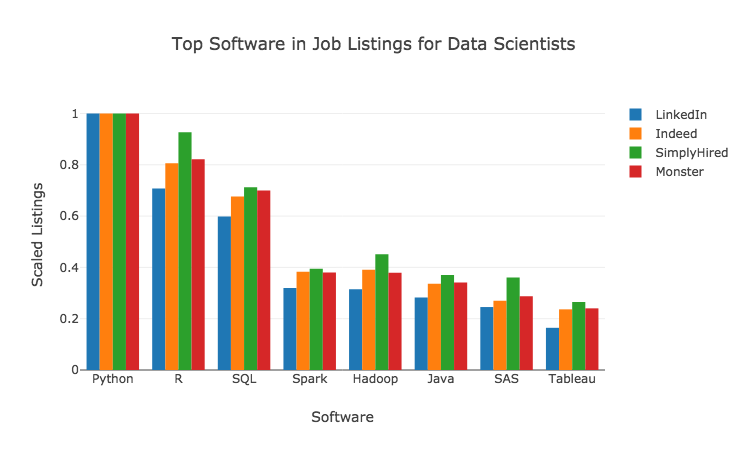

In [10]:
indeed = go.Bar(x=scaled_df.index, y=y_indeed, name = "Indeed")
simply = go.Bar(x=scaled_df.index, y=y_simply, name="SimplyHired")
monster = go.Bar(x=scaled_df.index, y=y_monster, name="Monster")
linked = go.Bar(x=scaled_df.index, y=y_linkedin, name="LinkedIn")

data = [linked, indeed, simply, monster]

layout = go.Layout(
    barmode='group',
    title="Top Software in Job Listings for Data Scientists",
    xaxis={'title': 'Software'},
    yaxis={'title': "Scaled Listings", 'separatethousands': True,
    }
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Let's clean things up for publication

In [11]:
p_s_df = scaled_df * 100
p_s_df = p_s_df.round(2)
p_s_df.columns = ['LinkedIn', 'Indeed', 'SimplyHired', 'Monster', 'Score']
p_s_df = p_s_df.sort_values(by=['Score'], ascending = False)
p_s_df.head()

,LinkedIn,Indeed,SimplyHired,Monster,Score
Keyword,,,,,
Python,100.00,100.00,100.00,100.00,100.00
R,70.79,80.63,82.16,92.69,81.57
SQL,59.81,67.62,70.02,71.29,67.19
Hadoop,31.53,39.05,37.87,45.12,38.39
Spark,31.97,38.31,37.98,39.49,36.94


Let's rename Microsoft Office. Otherwise it gets cut off.

In [12]:
p_s_df.rename(index = {'Microsoft Office': 'MS Office'}, inplace = True)
p_s_df

,LinkedIn,Indeed,SimplyHired,Monster,Score
Keyword,,,,,
Python,100.00,100.00,100.00,100.00,100.00
R,70.79,80.63,82.16,92.69,81.57
SQL,59.81,67.62,70.02,71.29,67.19
Hadoop,31.53,39.05,37.87,45.12,38.39
Spark,31.97,38.31,37.98,39.49,36.94
Java,28.30,33.58,34.09,37.04,33.25
SAS,24.54,26.97,28.72,36.06,29.07
Tableau,16.45,23.65,24.04,26.50,22.66
Hive,15.89,18.69,18.88,21.40,18.72


## Let's look at the top 20 scores

In [13]:
p_s_df_20 = p_s_df.iloc[:20,:]
p_s_df_20

,LinkedIn,Indeed,SimplyHired,Monster,Score
Keyword,,,,,
Python,100.00,100.00,100.00,100.00,100.00
R,70.79,80.63,82.16,92.69,81.57
SQL,59.81,67.62,70.02,71.29,67.19
Hadoop,31.53,39.05,37.87,45.12,38.39
Spark,31.97,38.31,37.98,39.49,36.94
Java,28.30,33.58,34.09,37.04,33.25
SAS,24.54,26.97,28.72,36.06,29.07
Tableau,16.45,23.65,24.04,26.50,22.66
Hive,15.89,18.69,18.88,21.40,18.72


## Let's make a bar chart of the top 20 combined scores

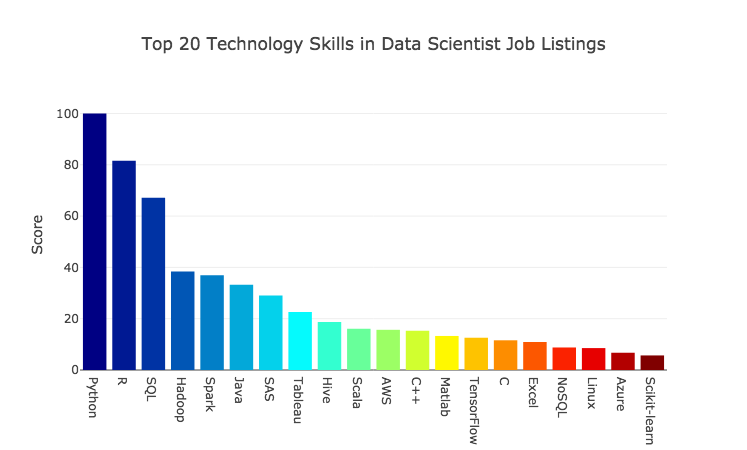

In [14]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 20)

data = [
    go.Bar(
        x=p_s_df_20.index,          
        y=p_s_df_20['Score'],
        marker=dict(
            colorscale='Jet',
            color=color_s,
        ),
    )
]

layout = {
    'title': 'Top 20 Technology Skills in Data Scientist Job Listings',
    #'xaxis': {'title': 'Technology'},
    'yaxis': {'title': "Score"}
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## Let's make a bar chart of all the combined scores

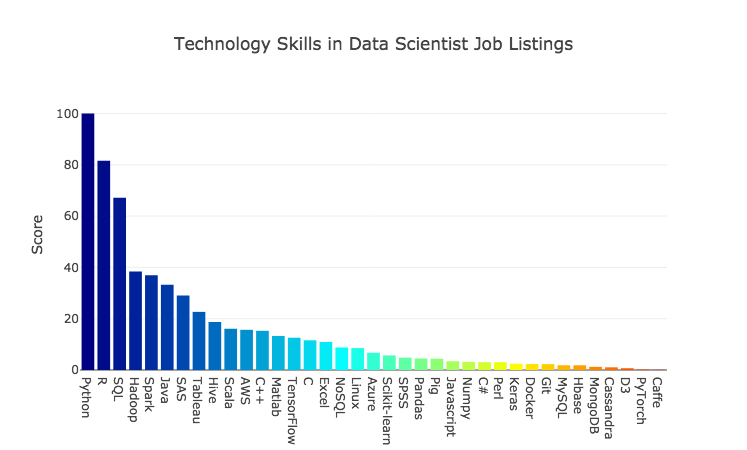

In [15]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 44)

data = [
    go.Bar(
        x=p_s_df.index,          
        y=p_s_df['Score'],
        marker=dict(
            colorscale='Jet',
            #cauto=True,
            color=color_s,
        ),
        # text=p_s_df['Score'],
        # textposition='outside',
        # textfont=dict(size=10)
    )
]

layout = {
    'title': 'Technology Skills in Data Scientist Job Listings',
    #'xaxis': {'tickmode': 'linear'},
    'yaxis': {'title': "Score"}
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## % of job listings with software skills


Total "data scientist" listings.

In [16]:
total_ds = {
    'LinkedIn': 8610,
    'Indeed': 5138,
    'SimplyHired': 3829,
    'Monster': 3746,
}

In [17]:
for key, value in total_ds.items():
    df[key + " %"] = df[key] / value * 100
df

,LinkedIn,Indeed,SimplyHired,Monster,LinkedIn %,Indeed %,SimplyHired %,Monster %
Keyword,,,,,,,,
Python,6347,3818,2888,2544,73.72,74.31,75.42,67.91
R,4553,3106,2393,2365,52.88,60.45,62.50,63.13
SQL,3879,2628,2056,1841,45.05,51.15,53.70,49.15
Spark,2169,1551,1167,1062,25.19,30.19,30.48,28.35
Hadoop,2142,1578,1164,1200,24.88,30.71,30.40,32.03
Java,1944,1377,1059,1002,22.58,26.80,27.66,26.75
SAS,1713,1134,910,978,19.90,22.07,23.77,26.11
Tableau,1216,1012,780,744,14.12,19.70,20.37,19.86
Hive,1182,830,637,619,13.73,16.15,16.64,16.52


Let's make an average of those % columns.

In [18]:
df['avg_percent'] = df.iloc[:,-4:].mean(axis=1)
df

,LinkedIn,Indeed,SimplyHired,Monster,LinkedIn %,Indeed %,SimplyHired %,Monster %,avg_percent
Keyword,,,,,,,,,
Python,6347,3818,2888,2544,73.72,74.31,75.42,67.91,72.84
R,4553,3106,2393,2365,52.88,60.45,62.50,63.13,59.74
SQL,3879,2628,2056,1841,45.05,51.15,53.70,49.15,49.76
Spark,2169,1551,1167,1062,25.19,30.19,30.48,28.35,28.55
Hadoop,2142,1578,1164,1200,24.88,30.71,30.40,32.03,29.51
Java,1944,1377,1059,1002,22.58,26.80,27.66,26.75,25.95
SAS,1713,1134,910,978,19.90,22.07,23.77,26.11,22.96
Tableau,1216,1012,780,744,14.12,19.70,20.37,19.86,18.51
Hive,1182,830,637,619,13.73,16.15,16.64,16.52,15.76


In [19]:
df = df.sort_values(by="avg_percent", ascending = False)
df

,LinkedIn,Indeed,SimplyHired,Monster,LinkedIn %,Indeed %,SimplyHired %,Monster %,avg_percent
Keyword,,,,,,,,,
Python,6347,3818,2888,2544,73.72,74.31,75.42,67.91,72.84
R,4553,3106,2393,2365,52.88,60.45,62.50,63.13,59.74
SQL,3879,2628,2056,1841,45.05,51.15,53.70,49.15,49.76
Hadoop,2142,1578,1164,1200,24.88,30.71,30.40,32.03,29.51
Spark,2169,1551,1167,1062,25.19,30.19,30.48,28.35,28.55
Java,1944,1377,1059,1002,22.58,26.80,27.66,26.75,25.95
SAS,1713,1134,910,978,19.90,22.07,23.77,26.11,22.96
Tableau,1216,1012,780,744,14.12,19.70,20.37,19.86,18.51
Hive,1182,830,637,619,13.73,16.15,16.64,16.52,15.76


## Let's chart the full list and then the top 20.

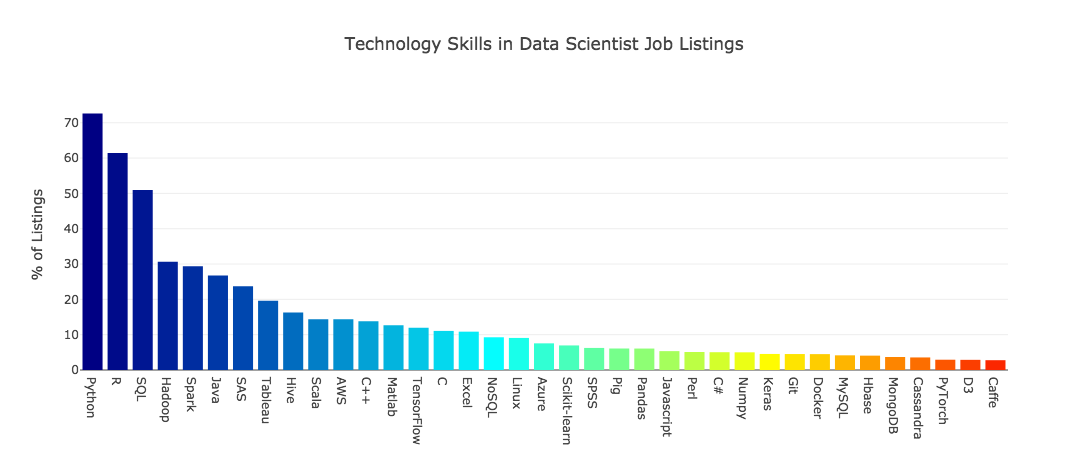

In [56]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 44)

data = [
    go.Bar(
        x=df.index,          
        y=df['avg_percent'],
        marker=dict(
            colorscale='Jet',
            color=color_s,
        ),
    )
]

layout = dict(
    title="Technology Skills in Data Scientist Job Listings",
    yaxis=dict(title="% of Listings",)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

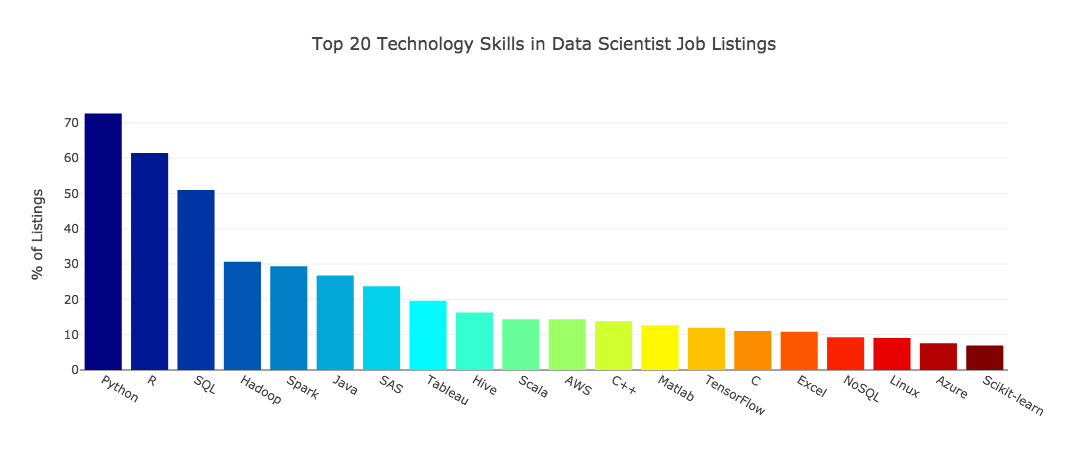

In [55]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 20)

data = [
    go.Bar(
        x=df.index,          
        y=df.iloc[:20, -1],
        marker=dict(
            colorscale='Jet',
            color=color_s,
        ),
    )
]

layout = dict(
    title="Top 20 Technology Skills in Data Scientist Job Listings",
    yaxis=dict(title="% of Listings",)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## Glassdoor comparision

Glassdoor has some similar analysis from early 2017 [here](https://www.glassdoor.com/research/data-scientist-personas/). See [my larger Medium article](https://towardsdatascience.com/the-most-in-demand-skills-for-data-scientists-4a4a8db896db) for discussion.

In [22]:
# percentage of data scientist jobs on glassdoor early 2017
glassdoor = {
    'Python': 72,
    'R': 64,
    'SQL': 51,
    'Spark': 27,
    'Hadoop': 39,
    'Java': 33,
    'SAS': 30,
    'Tableau': 14,
    'Hive': 17,
    'Matlab': 20
}

In [23]:
# make a data frame of just these
# could just merge the series and df 

series_gd = pd.Series(glassdoor)
series_gd

Python     72
R          64
SQL        51
Spark      27
Hadoop     39
Java       33
SAS        30
Tableau    14
Hive       17
Matlab     20
dtype: int64

In [24]:
df_gd = pd.merge(
    df, 
    pd.DataFrame(
        series_gd, 
        columns=['gd_percent']), 
    right_index=True, 
    left_index=True, 
    how="inner"
)

# df_gd = df_gd[""]
# df_gd.columns = 
df_gd

,LinkedIn,Indeed,SimplyHired,Monster,LinkedIn %,Indeed %,SimplyHired %,Monster %,avg_percent,gd_percent
Python,6347,3818,2888,2544,73.72,74.31,75.42,67.91,72.84,72
R,4553,3106,2393,2365,52.88,60.45,62.50,63.13,59.74,64
SQL,3879,2628,2056,1841,45.05,51.15,53.70,49.15,49.76,51
Hadoop,2142,1578,1164,1200,24.88,30.71,30.40,32.03,29.51,39
Spark,2169,1551,1167,1062,25.19,30.19,30.48,28.35,28.55,27
Java,1944,1377,1059,1002,22.58,26.80,27.66,26.75,25.95,33
SAS,1713,1134,910,978,19.90,22.07,23.77,26.11,22.96,30
Tableau,1216,1012,780,744,14.12,19.70,20.37,19.86,18.51,14
Hive,1182,830,637,619,13.73,16.15,16.64,16.52,15.76,17
Matlab,806,677,544,419,9.36,13.18,14.21,11.19,11.98,20


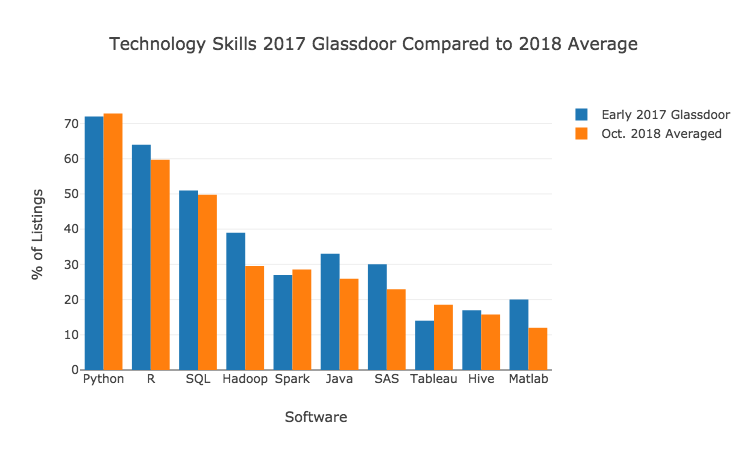

In [25]:
avg = go.Bar(x=df_gd.index, y=df_gd['avg_percent'], name="Oct. 2018 Averaged")
gd = go.Bar(x=df_gd.index, y=df_gd['gd_percent'], name="Early 2017 Glassdoor")


data = [gd, avg]

layout = go.Layout(
    barmode='group',
    title="Technology Skills 2017 Glassdoor Compared to 2018 Average",
    xaxis={'title': 'Technology'},
    yaxis={'title': '% of Listings'},
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Part 2: General Data Science Skills
Let's look at general data science skills next.

In [26]:
df_skills = pd.read_csv(
    'DS Job Listing Results/ds_job_list_skills.csv',
    nrows=14,
    thousands=',',
    index_col=0,  
    )
df_skills

,LinkedIn,Indeed,SimplyHired,Monster
Keyword,,,,
machine learning,5701,3439,2561,2340
analysis,5168,3500,2668,3306
statistics,4893,2992,2308,2399
computer science,4517,2739,2093,1900
communication,3404,2344,1791,2053
mathematics,2605,1961,1497,1815
visualization,1879,1413,1153,1207
AI composite,1568,1125,811,687
deep learning,1310,979,675,606


All terms were searched with *"data scientist"* again. The skills are tricky because there is some overlap. 

I combined *AI* and *artificial intelligence* because one is the abbreviation of the other. I did the same for *NLP* and *natural language processing*. I combined these terms be adding the totals together and subtracting the number of listings that had both terms in them.

Let's rename the composite indices.

In [27]:
df_skills.rename(index={'AI composite': 'AI', 'NLP composite': 'NLP'}, inplace = True)
df_skills

,LinkedIn,Indeed,SimplyHired,Monster
Keyword,,,,
machine learning,5701,3439,2561,2340
analysis,5168,3500,2668,3306
statistics,4893,2992,2308,2399
computer science,4517,2739,2093,1900
communication,3404,2344,1791,2053
mathematics,2605,1961,1497,1815
visualization,1879,1413,1153,1207
AI,1568,1125,811,687
deep learning,1310,979,675,606


# Scale and Aggregate 
Scale each column. For each column we'll use MinMaxScaler to subtract the minumum and divide by the original max - original min.

In [28]:
scale = MinMaxScaler()
scaled_df = pd.DataFrame(
    scale.fit_transform(df_skills), 
    columns = df_skills.columns,
    index = df_skills.index)    

In [29]:
scaled_df

,LinkedIn,Indeed,SimplyHired,Monster
Keyword,,,,
machine learning,1.00,0.98,0.96,0.68
analysis,0.90,1.00,1.00,1.00
statistics,0.85,0.84,0.85,0.70
computer science,0.78,0.76,0.76,0.53
communication,0.57,0.64,0.64,0.58
mathematics,0.41,0.52,0.52,0.50
visualization,0.28,0.35,0.37,0.30
AI,0.22,0.26,0.23,0.13
deep learning,0.17,0.21,0.18,0.10


### Scaled Online Job Listings

Let's make a combined score for the large sites by taking the mean of the LinkedIn, Indeed, and SimplyHired scores.

In [30]:
scaled_df['big_sites'] = scaled_df[["LinkedIn", "Indeed", "SimplyHired", "Monster"]].mean(axis = 1)
scaled_df.sort_values(by = 'big_sites', ascending = False)

,LinkedIn,Indeed,SimplyHired,Monster,big_sites
Keyword,,,,,
analysis,0.90,1.00,1.00,1.00,0.97
machine learning,1.00,0.98,0.96,0.68,0.90
statistics,0.85,0.84,0.85,0.70,0.81
computer science,0.78,0.76,0.76,0.53,0.71
communication,0.57,0.64,0.64,0.58,0.61
mathematics,0.41,0.52,0.52,0.50,0.49
visualization,0.28,0.35,0.37,0.30,0.33
AI,0.22,0.26,0.23,0.13,0.21
deep learning,0.17,0.21,0.18,0.10,0.16


## Let's look at them by site


In [31]:
y_linkedin = scaled_df.iloc[:, 0]
y_indeed = scaled_df.iloc[:, 1]
y_simply = scaled_df.iloc[:, 2]
y_monster = scaled_df.iloc[:, 3]

y_linkedin

Keyword
machine learning       1.00
analysis               0.90
statistics             0.85
computer science       0.78
communication          0.57
mathematics            0.41
visualization          0.28
AI                     0.22
deep learning          0.17
NLP                    0.15
software development   0.06
neural networks        0.05
project management     0.01
software engineering   0.00
Name: LinkedIn, dtype: float64

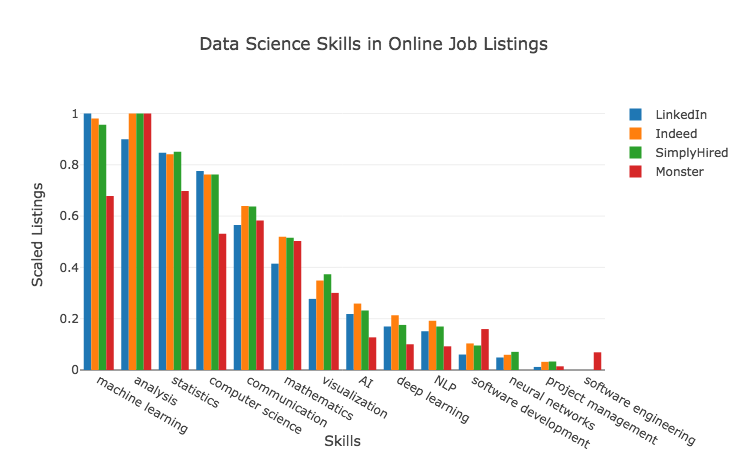

In [32]:
indeed = go.Bar(x=scaled_df.index, y=y_indeed, name = "Indeed")
simply = go.Bar(x=scaled_df.index, y=y_simply, name="SimplyHired")
linked = go.Bar(x=scaled_df.index, y=y_linkedin, name="LinkedIn")
monster = go.Bar(x=scaled_df.index, y=y_monster, name="Monster")

data = [linked, indeed, simply, monster]

layout = go.Layout(
    barmode='group',
    title="Data Science Skills in Online Job Listings",
    xaxis={'title': 'Skills'},
    yaxis={'title': "Scaled Listings", 'separatethousands': True,
    }
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Let's clean things up for publication

In [33]:
p_s_df = scaled_df * 100
p_s_df = p_s_df.round(2)
p_s_df.columns = ['LinkedIn', 'Indeed', 'SimplyHired', 'Monster', 'Score']
p_s_df = p_s_df.sort_values(by=['Score'], ascending = False)
p_s_df

,LinkedIn,Indeed,SimplyHired,Monster,Score
Keyword,,,,,
analysis,89.92,100.00,100.00,100.00,97.48
machine learning,100.00,98.10,95.57,67.81,90.37
statistics,84.72,84.15,85.11,69.78,80.94
computer science,77.61,76.26,76.22,53.15,70.81
communication,56.56,63.93,63.73,58.25,60.62
mathematics,41.45,51.98,51.57,50.32,48.83
visualization,27.72,34.88,37.34,30.06,32.50
AI,21.84,25.90,23.20,12.73,20.92
deep learning,16.96,21.34,17.58,10.03,16.48


## Let's make a bar chart of the combined scores

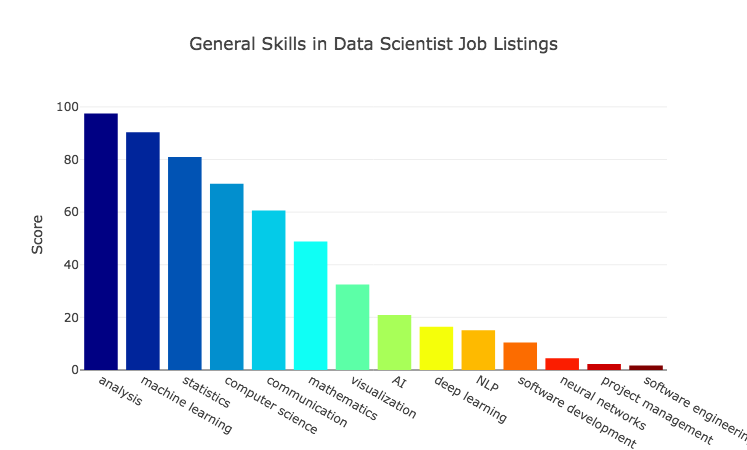

In [34]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 14)

data = [
    go.Bar(
        x=p_s_df.index,          
        y=p_s_df['Score'],
        marker=dict(
            colorscale='Jet',
            #cauto=True,
            color=color_s,
        ),
        # text=p_s_df['Score'],
        # textposition='outside',
        # textfont=dict(size=10)
    )
]

layout = {
    'title': 'General Skills in Data Scientist Job Listings',
    'xaxis': {'tickmode': 'linear'},
    'yaxis': {'title': "Score"}
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## Let's look at these general skills by % of occurrence, too.

In [47]:
total_ds = {
    'LinkedIn': 8610,
    'Indeed': 5138,
    'SimplyHired': 3829,
    'Monster': 3746,
}

In [48]:
for key, value in total_ds.items():
    df_skills[key + " %"] = df_skills[key] / value * 100
df_skills

,LinkedIn,Indeed,SimplyHired,Monster,LinkedIn %,Indeed %,SimplyHired %,Monster %
Keyword,,,,,,,,
machine learning,5701,3439,2561,2340,66.21,66.93,66.88,62.47
analysis,5168,3500,2668,3306,60.02,68.12,69.68,88.25
statistics,4893,2992,2308,2399,56.83,58.23,60.28,64.04
computer science,4517,2739,2093,1900,52.46,53.31,54.66,50.72
communication,3404,2344,1791,2053,39.54,45.62,46.77,54.81
mathematics,2605,1961,1497,1815,30.26,38.17,39.10,48.45
visualization,1879,1413,1153,1207,21.82,27.50,30.11,32.22
AI,1568,1125,811,687,18.21,21.90,21.18,18.34
deep learning,1310,979,675,606,15.21,19.05,17.63,16.18


Let's make an average of those % columns.

In [49]:
df_skills['avg_percent'] = df_skills.iloc[:,-4:].mean(axis=1)
df_skills

,LinkedIn,Indeed,SimplyHired,Monster,LinkedIn %,Indeed %,SimplyHired %,Monster %,avg_percent
Keyword,,,,,,,,,
machine learning,5701,3439,2561,2340,66.21,66.93,66.88,62.47,65.62
analysis,5168,3500,2668,3306,60.02,68.12,69.68,88.25,71.52
statistics,4893,2992,2308,2399,56.83,58.23,60.28,64.04,59.85
computer science,4517,2739,2093,1900,52.46,53.31,54.66,50.72,52.79
communication,3404,2344,1791,2053,39.54,45.62,46.77,54.81,46.68
mathematics,2605,1961,1497,1815,30.26,38.17,39.10,48.45,38.99
visualization,1879,1413,1153,1207,21.82,27.50,30.11,32.22,27.91
AI,1568,1125,811,687,18.21,21.90,21.18,18.34,19.91
deep learning,1310,979,675,606,15.21,19.05,17.63,16.18,17.02


In [50]:
df_skills = df_skills.sort_values(by="avg_percent", ascending = False)
df_skills

,LinkedIn,Indeed,SimplyHired,Monster,LinkedIn %,Indeed %,SimplyHired %,Monster %,avg_percent
Keyword,,,,,,,,,
analysis,5168,3500,2668,3306,60.02,68.12,69.68,88.25,71.52
machine learning,5701,3439,2561,2340,66.21,66.93,66.88,62.47,65.62
statistics,4893,2992,2308,2399,56.83,58.23,60.28,64.04,59.85
computer science,4517,2739,2093,1900,52.46,53.31,54.66,50.72,52.79
communication,3404,2344,1791,2053,39.54,45.62,46.77,54.81,46.68
mathematics,2605,1961,1497,1815,30.26,38.17,39.10,48.45,38.99
visualization,1879,1413,1153,1207,21.82,27.50,30.11,32.22,27.91
AI,1568,1125,811,687,18.21,21.90,21.18,18.34,19.91
deep learning,1310,979,675,606,15.21,19.05,17.63,16.18,17.02


## Let's chart the full list.

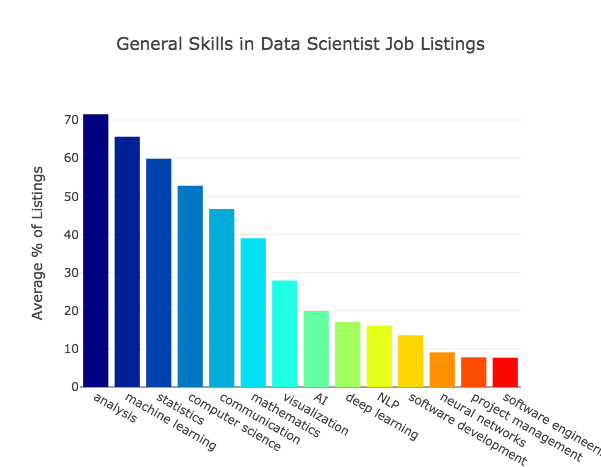

In [53]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 16)

data = [
    go.Bar(
        x=df_skills.index,          
        y=df_skills['avg_percent'],
        marker=dict(
            colorscale='Jet',
            color=color_s,
        ),
    )
]

layout = dict(
    title="General Skills in Data Scientist Job Listings",
    yaxis=dict(title="Average % of Listings",)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# A few summary stats

In [52]:
ds_results = pd.Series({
    'LinkedIn': 8610,
    'Indeed': 5138, 
    'SimplyHired': 3829,
    'Monster': 3746,
    'AngelList': 658
})
ds_results

LinkedIn       8610
Indeed         5138
SimplyHired    3829
Monster        3746
AngelList       658
dtype: int64

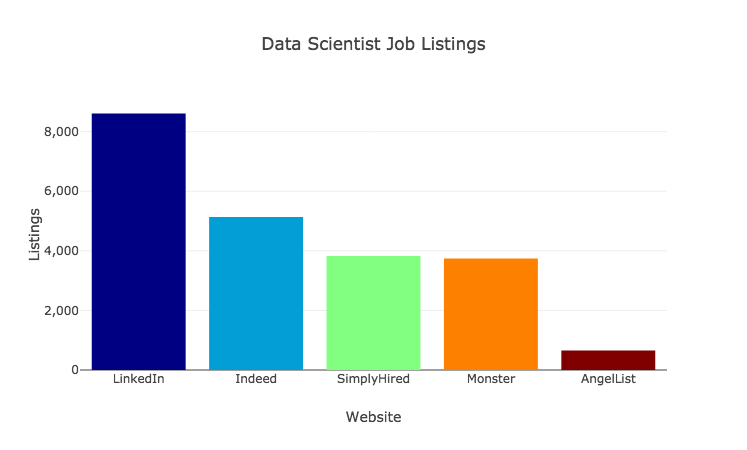

In [41]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 5)

data = [
    go.Bar(
        x=ds_results.index,          
        y=ds_results.values,
        marker=dict(
            colorscale='Jet',
            #cauto=True,
            color=color_s,
        ),
        # text=p_s_df['Score'],
        # textposition='outside',
        # textfont=dict(size=10)
    )
]

layout = {
    'title': "Data Scientist Job Listings",
    'xaxis': {'title': 'Website'},
    'yaxis': {'title': 'Listings', 'separatethousands': True,}
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)



# Pleave upvote if you found this interesting or informative!

## Postscript: Configuring Plotly

Plotly is super cool, but setup can be a bit tricky and there is a lot of old documentation mixed in with relevant documentation. Here's how to get up and running.

Follow the instructions on [plotly's site](https://github.com/plotly/plotly.py).

To install on Mac/Linux from the command line with support for plotly's magic, depending on what you already have installed see the plotly docs. Here's what I had to run with a relatively new conda install:

conda install -c plotly plotly=3.3.0 <br>
conda install -c conda-forge nodejs <br>
conda install jupyterlab=0.34 "ipywidgets>=7.2" <br>
export NODE_OPTIONS=--max-old-space-size=4096 <br>
jupyter labextension install @jupyter-widgets/jupyterlab-manager@0.37 --no-build <br>
jupyter labextension install plotlywidget@0.4.0 --no-build <br>
jupyter labextension install @jupyterlab/plotly-extension@0.17.2 --no-build <br>
jupyter lab build <br>
unset NODE_OPTIONS <br>